# 강의 - inflearn 섹션 5. 1~2, 5

##1. 가장 큰 수

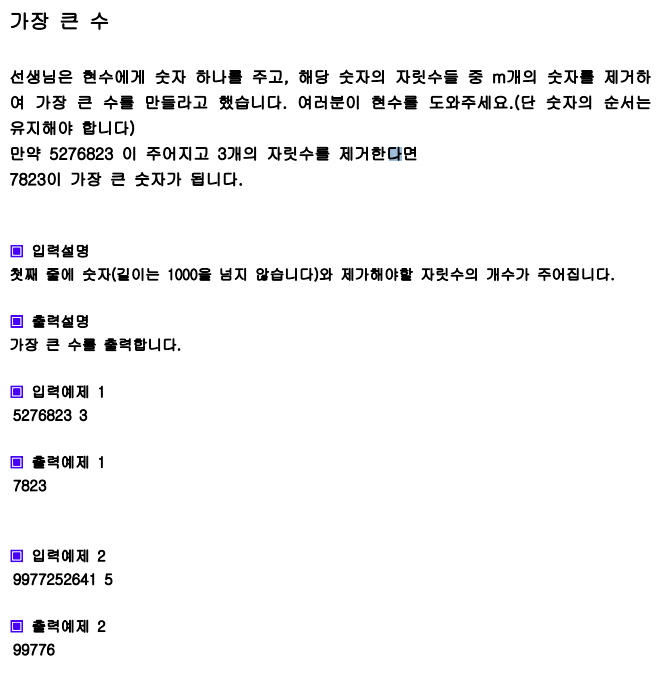

In [ ]:
import sys, time
import numpy as np
from collections import deque
import itertools

start = time.time()

# sys.stdin = open("input.txt", "r")   

if __name__ == '__main__':
      num, m = map(int, input().split())

      num = list(map(int, str(num)))
      
      stack = []
      for x in num :
            #stack이 비어있지 않고, m이 0보다 크며 stack의 마지막 값이 x보다 작을 경우 == True
            while stack and m > 0 and stack[-1] < x : 
                  stack.pop() # 제일 끝 데이터 빼내기
                  m -=1
            stack.append(x)

      if m != 0 :
            result = stack[:-m]
      else :
            result = stack


      for i in result :
            print(i, end="")

##2. 쇠막대기

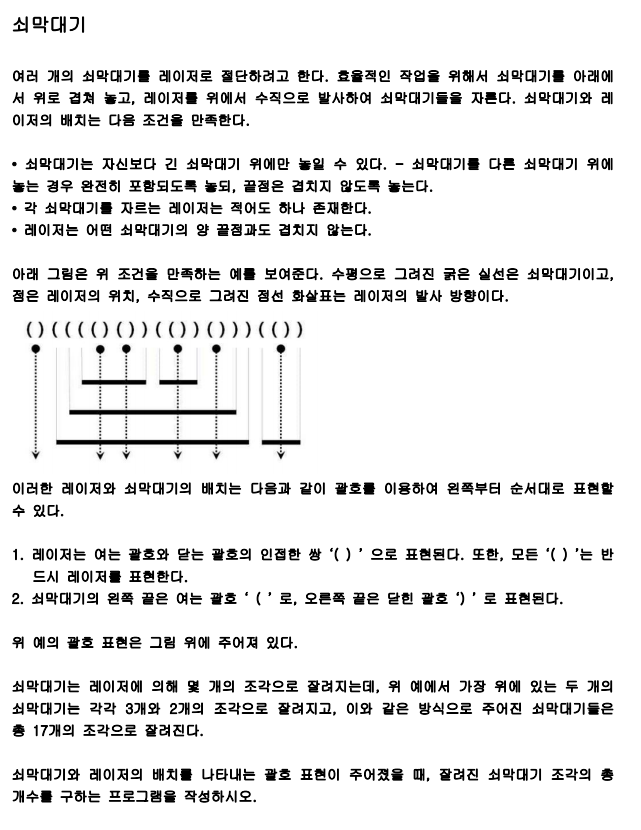

In [ ]:
import sys, time
import numpy as np
from collections import deque
import itertools

start = time.time()

# sys.stdin = open("input.txt", "r")   

if __name__ == '__main__':
      l = str(input())

      l = list(map(str, l))

      res = 0
      cnt = 0

      for i in range(len(l)) :
            if l[i] == "(" and l[i+1] == ")" :
                  res += cnt            
                  # print(res,cnt)   
                  
            elif l[i] == "(" :
                  cnt += 1
            
            elif l[i] == ")" and l[i-1] != "(":
                  res += 1
                  cnt -= 1

 
      print(res)

##3. 공주 구하기

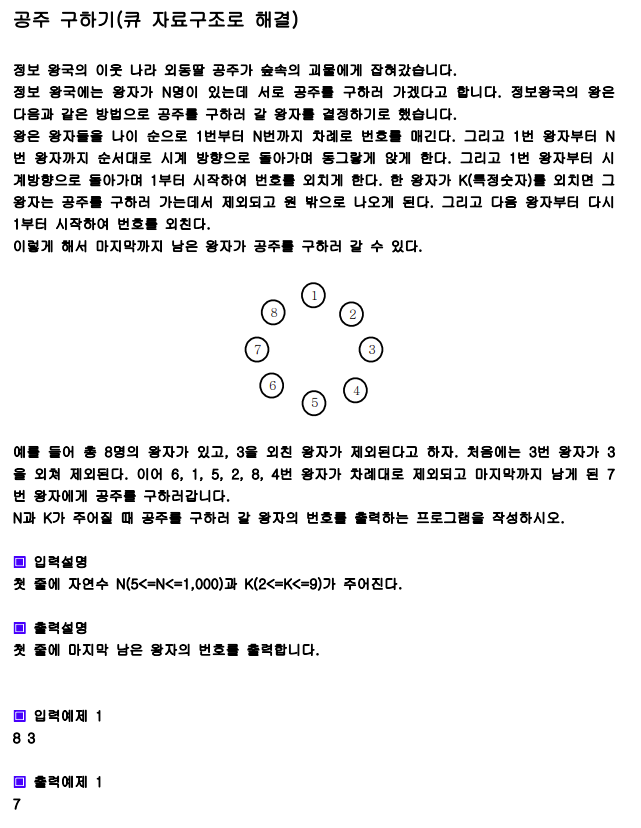

In [ ]:
# 내 풀이


import sys, time
import numpy as np
from collections import deque
import itertools

start = time.time()

# sys.stdin = open("input.txt", "r")   

if __name__ == '__main__':
      
      n, k = map(int, input().split())

      princess = [i+1 for i in range(n)]
      cnt = 0
      while len(princess) > 1 :
            result = []            

            for i in range(len(princess)) :
                  cnt += 1
                  if cnt % k != 0 :
                        result.append(princess[i])                       

            princess = result

      print(princess[0])

- 스택Stack은 먼저 들어간게 나중에 나오고(LIFO), 큐Que는 먼저 들어간 게 먼저 나온다(FIFO)
- 이를 파이썬에서 구현한 것이 deque이며, deque는 LIFO와 FIFO 모두 구현 가능하다.

In [ ]:
# deque를 이용한 방법

import sys, time
import numpy as np
from collections import deque
import itertools

start = time.time()

sys.stdin = open("input.txt", "r")   

if __name__ == '__main__':
      
      n, k = map(int, input().split())

      dQ = list(range(1,n+1))

      dQ = deque(dQ) #deque형 자료구조로 변경

      while len(dQ) > 1 : # 한 명이 남을 때까지 반복
            for _ in range(k-1) :
                  cur = dQ.popleft() # 앞의 k-1 개를 빼서
                  dQ.append(cur)  # 뒤에 붙인다
            
            dQ.popleft() # k 번째 값을 제거

      print(dQ[0]) # 하나 남은 값을 출력

# 프로그래머스 문제 풀이

##1. 주식가격
https://programmers.co.kr/learn/courses/30/lessons/42584

In [ ]:
# 1차 - 정답은 맞췄으나 효율성 0점 : 총계 66.7점

def solution(prices) :
    
    period = [0] * (len(prices))
    
    
    for i in range(len(prices)-1) :
        cnt = 0
        for j in prices[i+1:] :
            cnt += 1
            if prices[i] > j :
                period[i] = cnt
                break
        if period[i] == 0 and cnt != 0 :
            period[i] = cnt  
    
    return period

In [ ]:
# 2차 - 효율성 개선을 위해 deque형 자료구조를 사용했으나 효율성 문제 1문제 미달성 : 93.3점
from collections import deque

def solution(prices) :
    
    period = [0] * len(prices)
    
    prices = deque(prices)
    
    cnt = 0
    
    while len(prices) > 1 :
        price = prices.popleft()        

        for i in range(len(prices)) :           
            if price > prices[i] :
                period[cnt] = i+1
                break

        if period[cnt] == 0  :
            period[cnt] = i+1                   

        cnt += 1
    
    return period

4

In [ ]:
# 3차 개선 - 100점
from collections import deque

def solution(prices) :
    
    period = []
    
    prices = deque(prices)    
       
    while prices :
        price = prices.popleft()   
        
        cnt = 0

        for i in prices:           
            if price > i :
                cnt += 1
                break
            else :
                cnt += 1
                
        period.append(cnt)
        
    return period
